In [127]:
import numpy as np
import pandas as pd

In [128]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [129]:
# https://www.cs.toronto.edu/-delve/data/boston/bostonDetail.html
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [130]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

In [131]:
df['RAD'][0] = np.nan
df['TAX'][4] = 0
df['AGE'][1] = 0


# Exploratory

In [132]:
df.shape

(506, 14)

In [133]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,NaN,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,0.0,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,0.0,18.7,396.90,5.33,36.2


In [134]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.418972,3.795043,9.566337,407.798419,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.309625,2.105710,8.707553,169.310070,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,0.000000,1.129600,1.000000,0.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,44.550000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.150000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [135]:
data = df[df['TAX'] > 0]
data = data[data['AGE'] > 0]

In [136]:
data.shape

(504, 14)

In [137]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,NaN,296.0,15.3,396.90,4.98,24.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [138]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [139]:
# https://pandas.pydata.org/pandas-docs/stable/reference.dropna.html
data = data.dropna()

In [140]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [141]:
data.shape

(503, 14)

In [142]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1


In [143]:
# https://pandas.pydata.org/pandas-docs/stable/api/pandas/DataFrame/reset_index.html
data.reset_index(drop=True, inplace=True)

In [144]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
2,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
3,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
4,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1


# Visualization

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

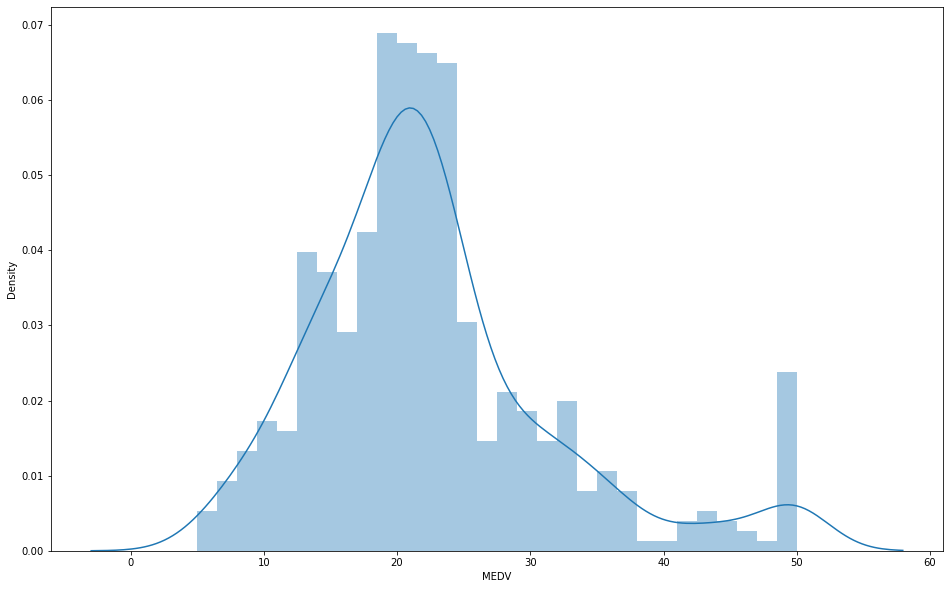

In [166]:
plt.figure(figsize=(16,10))
sns.distplot(data['MEDV'], bins=30)

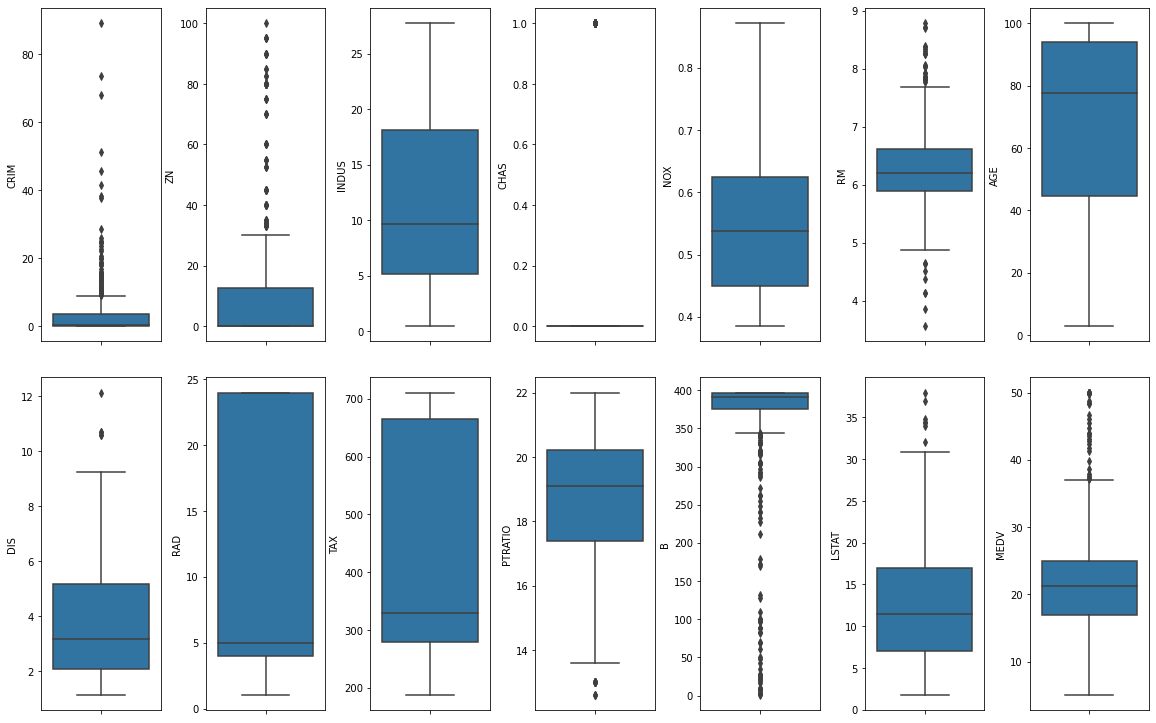

In [177]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(16,10))
axes = axes.flatten()
i = 0 
for c,d in data.items():
    sns.boxplot(y=c, data=data, ax=axes[i])
    i += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

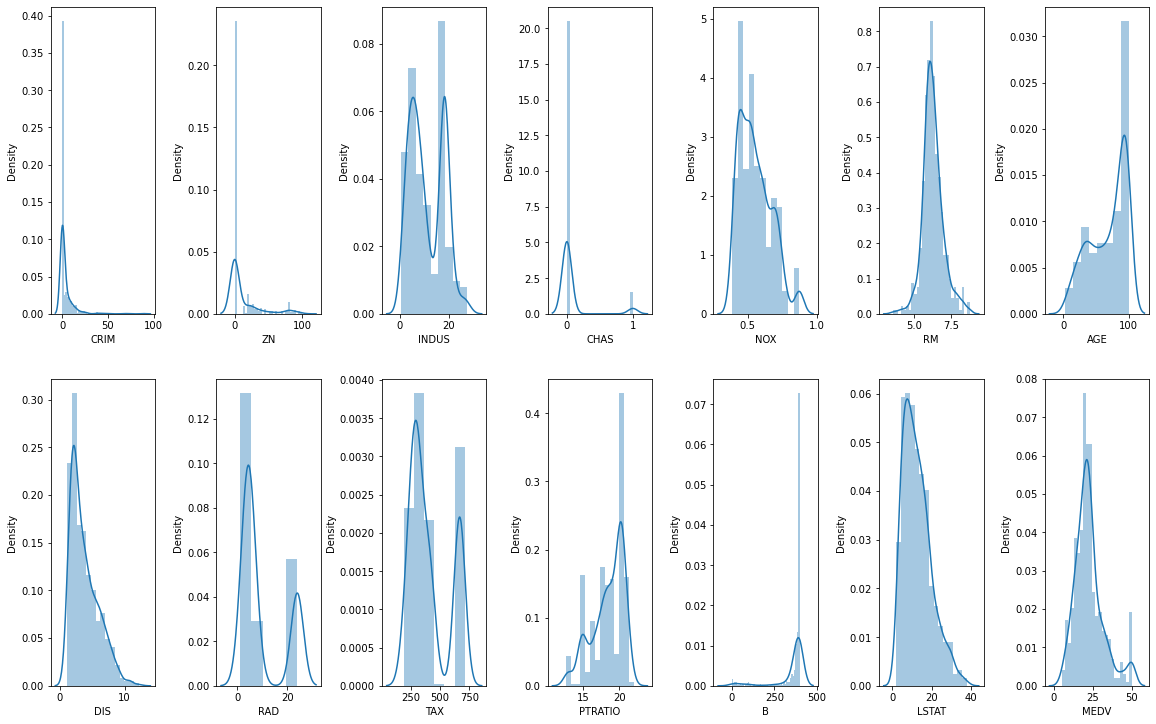

In [179]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(16,10))
i = 0
axes = axes.flatten()
for c,d in data.items():
    sns.distplot(d, ax=axes[i])
    i += 1
plt.tight_layout(pad=0.5, h_pad=3, w_pad=0.5)

In [185]:
# Let's remove MEDV outline (MEDV = 50.0) before plotting more distributions
data = data[(data['MEDV'] < 50)]
data.shape

(487, 14)

<AxesSubplot:>

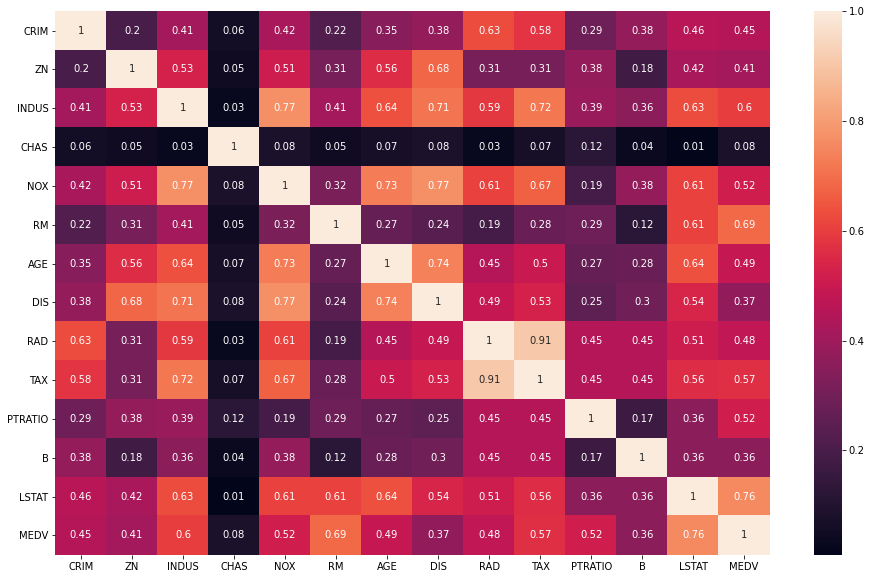

In [184]:
plt.figure(figsize=(16,10))
correlation_matrix = data.corr().abs().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

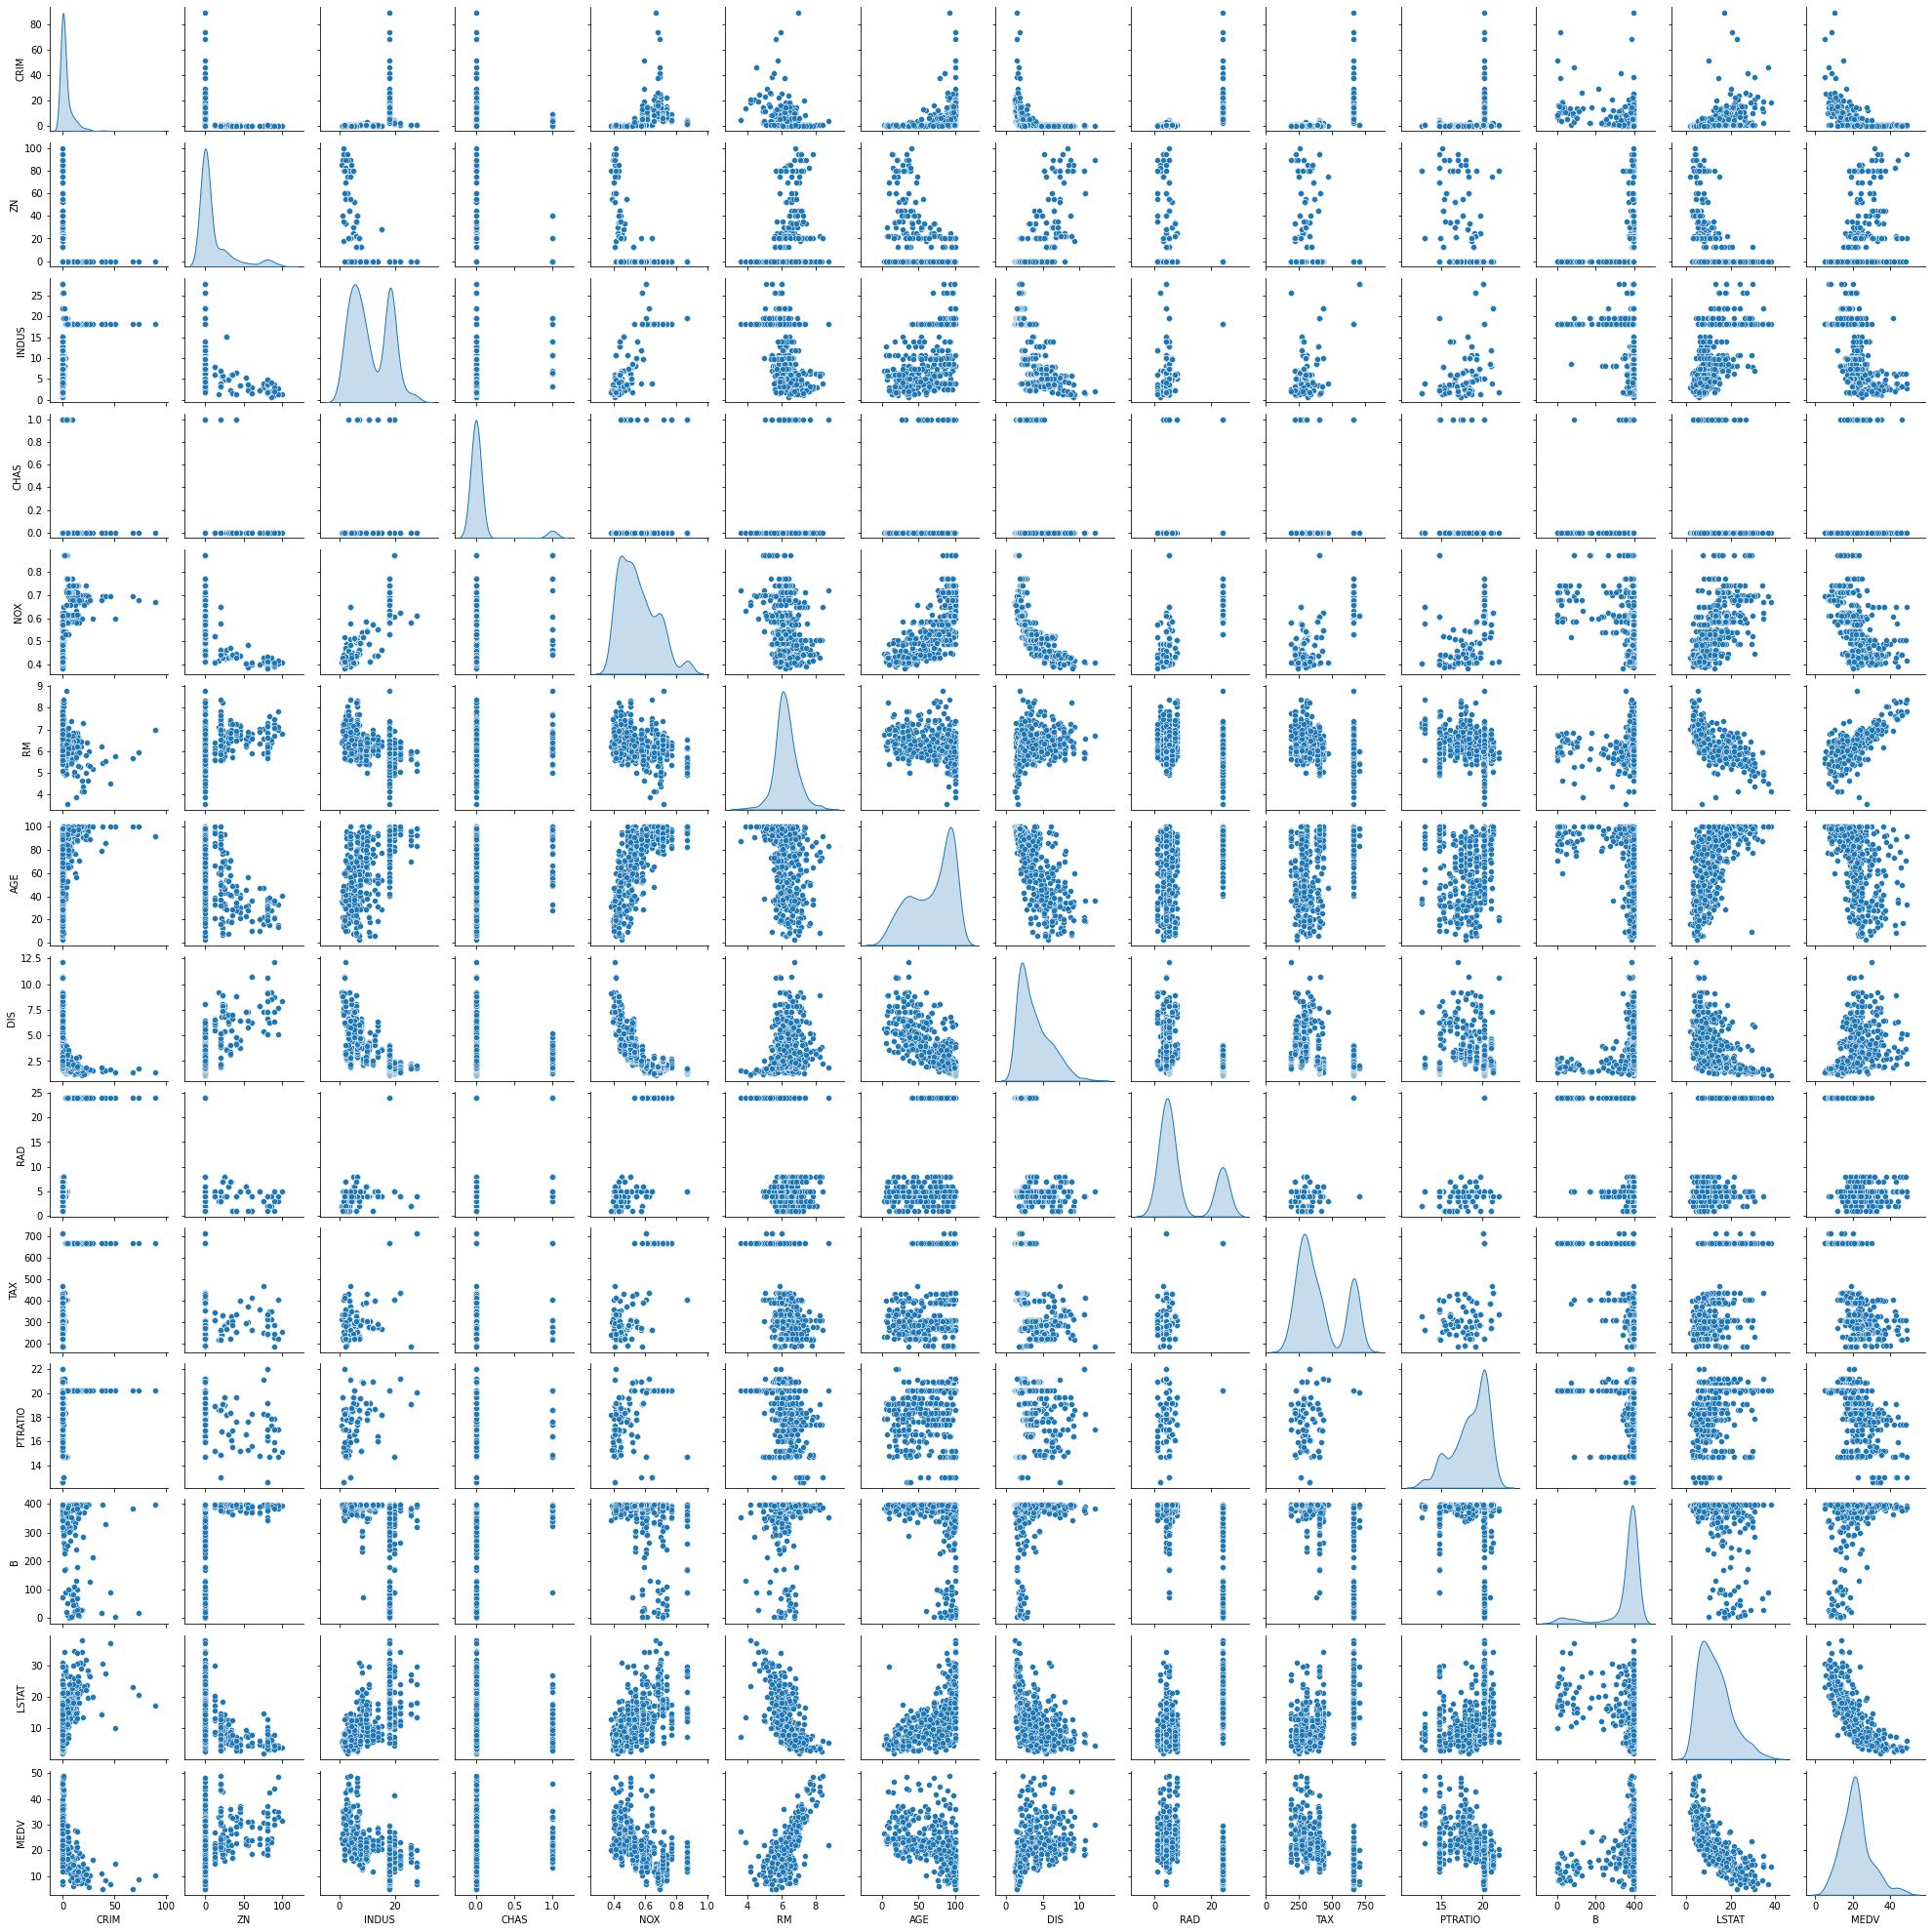

In [187]:
sns.pairplot(data,height=2, kind= 'scatter', diag_kind='kde')

In [203]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
clms = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

x = data.loc[:,clms]
y = data['MEDV']
x_scale = min_max_scaler.fit_transform(x)
dfx = pd.DataFrame(data=x_scale, columns=clms)

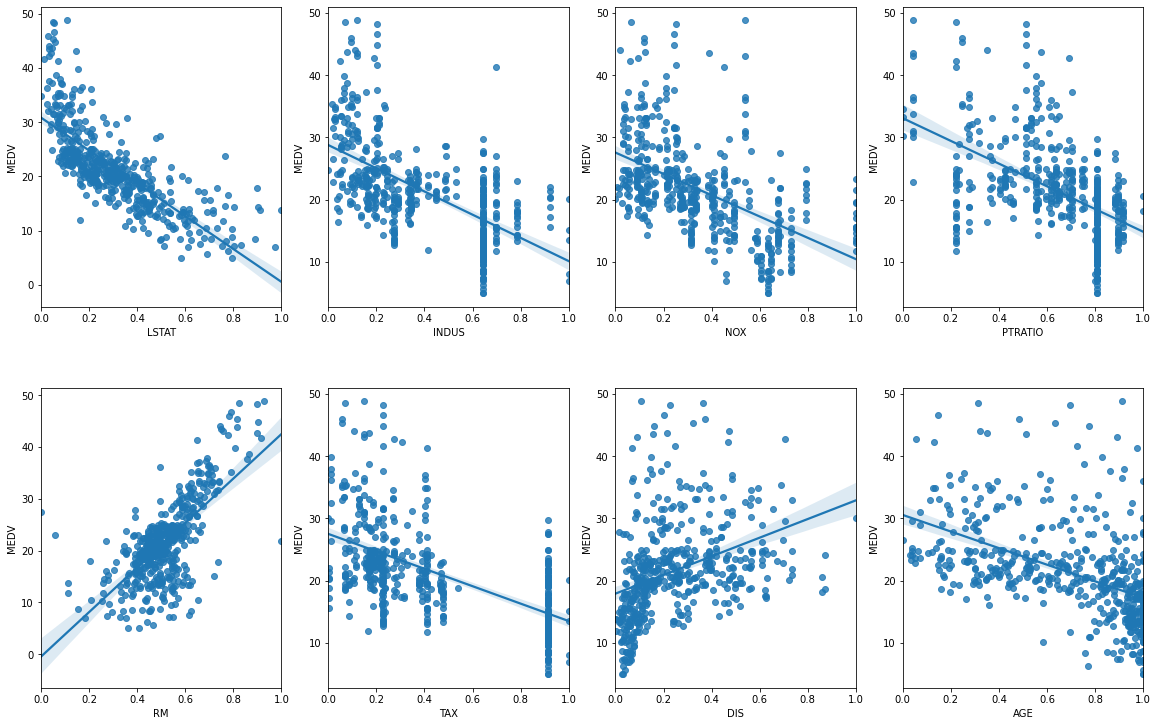

In [206]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16,10))
i = 0
axs = axs.flatten()
for i,c in enumerate(clms):
    sns.regplot(y=y, x=dfx[c], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

# Category Data

<AxesSubplot:xlabel='DIS', ylabel='NOX'>

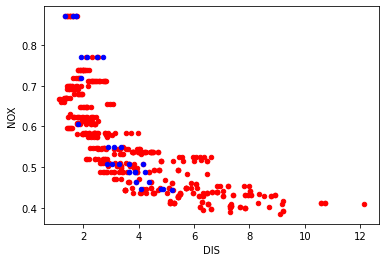

In [217]:
fig, ax = plt.subplots()
data.query('CHAS==0').plot.scatter(x='DIS', y='NOX', ax=ax, color= 'r')
data.query('CHAS==1').plot.scatter(x='DIS', y='NOX', ax=ax, color= 'b')

In [220]:
len(data.query('CHAS==0')), len(data.query('CHAS==1'))

(458, 29)

<AxesSubplot:xlabel='CHAS', ylabel='NOX'>

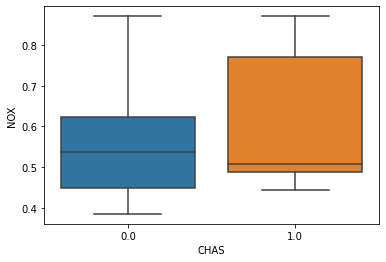

In [222]:
sns.boxplot(x='CHAS', y='NOX', data=data)

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

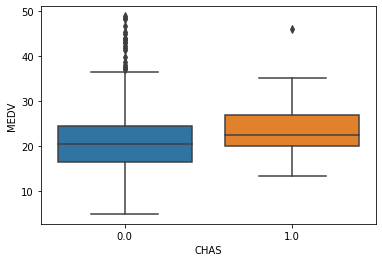

In [223]:
sns.boxplot(x='CHAS', y='MEDV', data=data)